## Imports

In [924]:
from tp_knn_source import *
import seaborn as sns
from matplotlib import rc
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
import itertools

## Plot and seaborn parameters

In [2]:
# Plot
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
# Seaborn
sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
# Seed initialization
np.random.seed(seed=44)
# For saving files
saving_activated = True # False

#### 1) Étudiez les fonctions rand_bi_gauss, rand_tri_gauss, rand_clown et rand_checkers. Que renvoient ces fonctions? À quoi correspond la dernière colonne? Générez les données en utilisant chaque de ces 4 fonctions avec les paramètres du corrigé du TP1 (pour rand_checkers générez 150 observations dans chaque classe; pour rand_tri_gauss générez 50 observations dans chaque classe, centrées en (1, 1)⊤, (−1, −1)⊤ et (1, −1)⊤, tous les écart-types égaux à 0.9). On va nommer ces jeux de données #1, #2, #3 et #4, respectivement.

Ces fonctions renvoient des échantillons de données aléatoires générées à partir de lois de distributions particulières. Chacune de ces fonctions génère des X de dimension p=2.
> * **rand_bi_gauss** : Les valeurs des colonnes de X proviennent de deux distributions normales de paramêtres distincts, reparties aléatoirement selon des proportions pré-définies. Les valeurs de Y sont égales à 1 ou -1. <br>
> * **rand_tri_gauss** : Les valeurs des colonnes de X proviennent de trois distributions normales de paramêtres distincts,  reparties aléatoirement selon des proportions pré-définies. Les valeurs de Y sont égales à 1, 2 ou 3. <br> 
> * **rand_clown** : Les valeurs des colonnes de X proviennent de mixtures de distributions uniformes. Les valeurs de Y sont égales à 1 ou -1. <br>
> * **rand_checkers** : Les valeurs des colonnes de X proviennent de mixtures de distributions uniformes. Les valeurs de Y sont égales à 1, 2 ou 3. <br> 

In [3]:
# rand_gauss sample
n = 10
mu = [1., 1.]
sigmas = [1., 1.]
random_gaussian = rand_gauss(n, mu, sigmas)
random_gaussian

array([[ 0.24938528,  2.31635732],
       [ 2.24614003, -0.60491574],
       [-0.46814368, -0.71507046],
       [ 2.85878369,  1.08758798],
       [ 0.9476778 ,  1.55547164],
       [ 0.03659631,  0.81967853],
       [-0.18340916,  1.60544592],
       [ 0.04834945,  1.36085606],
       [ 2.06061026,  0.88284782],
       [ 1.82566485, -0.20981355]])

In [781]:
# rand_bi_gauss sample
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)
X1, y1

(array([[ 1.80181861e+00,  1.19631125e+00],
        [-7.37131732e-01, -2.40420976e+00],
        [ 1.42572228e+00,  1.74017600e+00],
        [-2.03443494e+00, -1.19527709e-01],
        [ 1.66569069e+00,  2.48254975e+00],
        [ 2.60805147e+00,  1.63151804e+00],
        [ 1.54141809e+00,  8.37499787e-01],
        [-2.57769769e+00, -2.67211687e+00],
        [-1.81176614e+00, -1.10378002e+00],
        [-9.74070946e-01, -2.13416020e+00],
        [ 1.03706691e+00,  1.09077961e+00],
        [ 2.61552773e+00,  9.86539058e-01],
        [ 4.03657755e-01,  1.62470502e+00],
        [ 9.33550751e-01, -3.27624839e-01],
        [-2.89457864e-01,  1.25589224e+00],
        [-1.41641251e+00, -9.55423697e-01],
        [ 4.06894212e-01, -1.53823911e+00],
        [-2.00653421e+00, -1.79525245e+00],
        [ 1.18547116e+00,  4.88023296e-01],
        [ 2.63542928e+00,  2.29699931e+00],
        [ 1.91987868e+00,  1.65032243e+00],
        [-9.49488739e-01, -2.57512719e+00],
        [-1.03132809e+00, -1.172

In [776]:
# rand_tri_gauss sample
n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
sigmas3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3,  mu1,
                   mu2, mu3, sigmas1,
                   sigmas2, sigmas3)
X2, y2

(array([[ 0.48023519,  0.69863826],
        [ 1.37836832, -0.2697252 ],
        [ 1.60362991,  0.31727375],
        [-0.01902861, -0.23839781],
        [-1.32344856, -2.1378628 ],
        [ 2.12841531,  2.02160609],
        [-1.10491384, -0.3451248 ],
        [ 2.68877519, -1.56844736],
        [ 1.14655816, -0.74861201],
        [ 2.23989795,  0.0727629 ],
        [ 1.60860578, -1.19525282],
        [ 0.04311767,  1.98516066],
        [ 2.06922698, -3.53075846],
        [ 0.35509665,  0.08897282],
        [-1.53891086,  0.91836351],
        [ 0.44657406, -1.68013404],
        [-0.05937421, -1.66919281],
        [-1.21420182, -2.94569343],
        [ 0.44879494, -0.85917036],
        [ 0.74901514, -0.39048967],
        [ 0.18476532,  0.69097788],
        [ 0.84154483, -1.43677457],
        [-2.14777456, -0.56408572],
        [-0.23298341,  0.19720139],
        [ 1.73946535, -1.84729911],
        [-2.05007174, -1.14466927],
        [-0.4886025 , -1.93110379],
        [ 1.33695523,  1.113

In [6]:
# rand_clown sample
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X3, y3 = rand_clown(n1, n2, sigmas1, sigmas2)
X3, y3

(array([[-7.70339747, -1.70442314],
        [ 5.96780918,  4.56890522],
        [ 0.72150199,  0.31124305],
        [ 0.70811259, -0.06936383],
        [-4.49107157,  8.22668503],
        [ 1.58670896,  3.25534313],
        [-1.76052327,  2.54750894],
        [ 0.39495509, -0.42178118],
        [ 3.36376931,  0.50441036],
        [-0.05316535,  0.8411577 ],
        [-4.85508381,  3.92394997],
        [ 1.34210672,  1.43371156],
        [-0.53782205,  0.77082992],
        [-0.77601085, -0.28609959],
        [ 0.38344962, -0.58683084],
        [-1.38735166,  1.95395416],
        [-0.7507191 ,  0.46262829],
        [-0.10903214, -2.62217196],
        [-4.10287625, -0.78445015],
        [-0.39044631,  0.24580984],
        [ 5.76148208,  1.68874908],
        [ 1.44331004,  3.45243552],
        [ 1.53592944,  2.64668961],
        [-1.11436958,  2.60795141],
        [ 3.47701971, -2.20224   ],
        [-0.06905842,  0.70847355],
        [ 1.96981238,  1.6620431 ],
        [-4.68161996,  0.852

In [845]:
# rand_checkers sample
n1 = 75
n2 = 75
sigma = 0.1
X4, y4 = rand_checkers(n1, n2, sigma)
X4, y4

(array([[ 0.32702514,  0.58086863],
        [-0.1086889 ,  0.30225285],
        [ 0.10378763, -0.33101391],
        [-0.09198108, -1.51735758],
        [ 0.37577172, -0.19357399],
        [ 0.72473546, -0.28458564],
        [ 0.16837105,  1.32973823],
        [ 1.39443945,  0.99877091],
        [ 1.78083487,  0.13049574],
        [-0.89802539, -1.41740532],
        [ 0.47638074,  1.19479677],
        [ 1.69725615, -0.81019698],
        [-0.29323032, -1.56696389],
        [ 0.02478375,  0.05757498],
        [-1.07317955,  1.67650468],
        [ 0.41554835,  1.41020904],
        [ 1.54972184, -0.00806729],
        [-1.1190614 , -1.48903328],
        [ 0.5639285 , -0.21827072],
        [-0.65239564,  2.01368326],
        [-1.85303283, -0.80518513],
        [ 2.1329278 , -0.2718311 ],
        [-1.02304817,  1.90757889],
        [ 0.32040639,  0.72754298],
        [ 0.75011727, -1.92031178],
        [ 1.59459794, -1.11454231],
        [ 1.94161879,  1.11704159],
        [ 1.21221669, -1.591

#### 2) Utilisez la fonction plot_2d afin d’afficher les jeux de données générés avec chacune des fonctions.

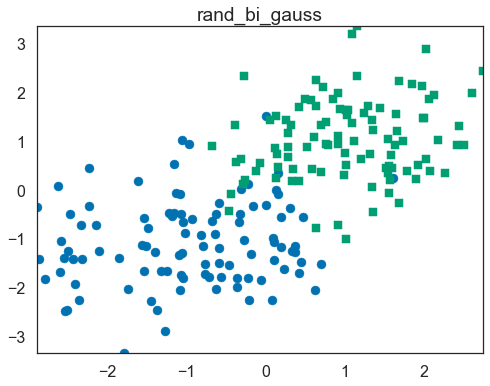

In [852]:
plot_2d(X1, y1)
plt.title("rand_bi_gauss")
plt.show()

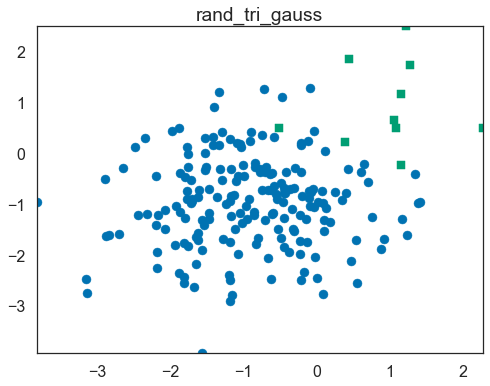

In [853]:
plot_2d(X2, y2)
plt.title("rand_tri_gauss")
plt.show()

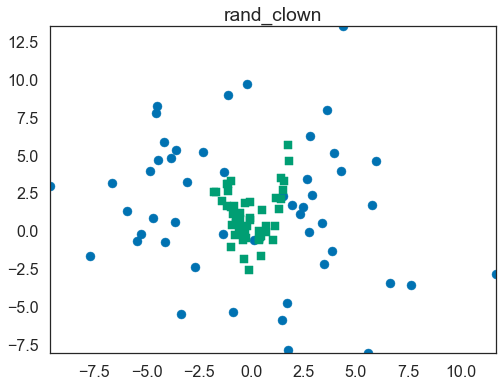

In [854]:
plot_2d(X3, y3)
plt.title("rand_clown")
plt.show()

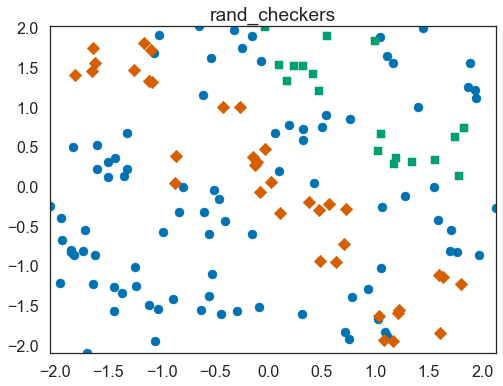

In [855]:
plot_2d(X4, y4)
plt.title("rand_checkers")
plt.show()

#### 3) Proposez une version adaptée de cette méthode pour la régression, i.e., quand les observations y sont à valeurs réelles : Y = R.

On associe à x la moyenne empirique des y associés aux k points les plus proches.

#### 4) Écrivez votre propre classe KNNClassifier avec les méthodes d’apprentissage fit et de classification predict.

In [936]:
import random
import math
import operator

from sklearn.base import BaseEstimator, ClassifierMixin
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade kNN classifier class """
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, x):
        
        # Function to compute the euclidean distance between two instances
        def get_distance(data1, data2, length):
            distance = 0
            for x in range(length):
                distance += pow((data1[x] - data2[x]), 2)
            return math.sqrt(distance)
        
        # Function to obtain the k-nearest neighbors of the testInstance in the training set
        def get_neighbors(training_set, test_instance, k):
            distance_dic = {}
            i = 0
            for test_instance_i in test_instance:
                distances = []
                length = len(test_instance_i)
                for x in range(len(training_set)):
                    dist = get_distance(test_instance_i, training_set[x], length)
                    distances.append((training_set[x], dist))
                # Neighbors are sorted depending on the distance as a first criteria, 
                # then the value of the first feature
                distances.sort(key=operator.itemgetter(1,0))
                neighbors = []
                for x in range(k):
                    neighbors.append(distances[x][0])
                distance_dic[i] = neighbors
                i+=1
            return distance_dic

        # Function to obtain the majority class among neighbors
        def get_majority_class(neighbors):
            classVotes = {}
            for x in range(len(neighbors)):
                response = neighbors[x][-1]
                if response in classVotes:
                    classVotes[response] += 1
                else:
                    classVotes[response] = 1
            sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
            return sortedVotes[0][0]

        train = np.c_[self.X, self.y]
        neighbors = get_neighbors(train, x, self.n_neighbors)
        result = []
        for key, value in neighbors.items():
            result.append(get_majority_class(value))
        return result

In [937]:
# Function to obtain the accuracy score of a KNN model
def accuracy_score(y_test, predictions):
    correct = 0
    for x in range(len(y_test)):
        if y_test[x] == predictions[x]:
            correct += 1
    return (correct/float(len(y_test))) * 100.0

# Split the data in order to compute the accuracy score
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=1)
k = 10

clf_homemade = KNNClassifier(k)
model_homemade = clf_homemade.fit(X_train, y_train)

clf = neighbors.KNeighborsClassifier(k)
model = clf.fit(X_train.tolist(), y_train)

# Predictions using our homemade class
pred_homemade = model_homemade.predict(X_test)

# Predictions using sklearn
pred = model.predict(X_test)

for i in range(len(pred_homemade)):
    print('≫ homemade prediction = ' + repr(pred_homemade[i]) + ' sklearn prediction = ' + repr(pred[i]) + ' ════ ⋆★⋆ ════  actual = '+ repr(y_test[i]) +' ≪')

accuracy_homemade = accuracy_score(y_test, pred_homemade)
accuracy = accuracy_score(y_test, pred)
print('Homemade accuracy: ' + repr(accuracy_homemade) + '%')
print('Sklearn accuracy: ' + repr(accuracy) + '%')

≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = 1.0 sklearn prediction = 1.0 ════ ⋆★⋆ ════  actual = 1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ════ ⋆★⋆ ════  actual = -1.0 ≪
≫ homemade prediction = -1.0 sklearn prediction = -1.0 ══

In [815]:
def frontiere_new(f, X, y, w=None, step=50, alpha_choice=1, colorbar=True,
                  samples=True):
    """ trace la frontiere pour la fonction de decision f"""
    # construct cmap

    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])

    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    z = np.array([f.predict([vec]) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    labels = np.unique(z)
    color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    sns.set_palette(color_blind_list)
    my_cmap = ListedColormap(color_blind_list)
    plt.imshow(z, origin='lower', interpolation="mitchell", alpha=0.80,
               cmap=my_cmap, extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    if colorbar is True:
        ax = plt.gca()
        cbar = plt.colorbar(ticks=labels)
        cbar.ax.set_yticklabels(labels)

    labels = np.unique(y)
    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    sns.set_palette(color_blind_list)
    ax = plt.gca()
    if samples is True:
        for i, label in enumerate(y):
            label_num = np.where(labels == label)[0][0]
            plt.scatter(X[i, 0], X[i, 1], c=color_blind_list[label_num],
                        s=80, marker=symlist[label_num])
    plt.xlim([min_tot0, max_tot0])
    plt.ylim([min_tot1, max_tot1])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)

#### 5) Faites tourner sur les quatre exemples de jeu de données cet algorithme de classification, en utilisant la distance euclidienne classique d(x, v) = ∥x − v∥2 et k = 5. Visualisez les règles de classification obtenues en utilisant la fonction frontiere_new. (Souvent, les autres choix de distance peuvent être utiles, par exemple la distance de Mahalanobis.)

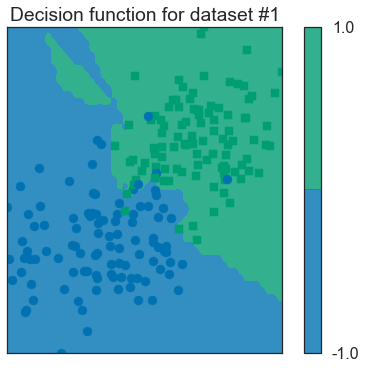

In [856]:
# Decision function for dataset #1
clf = neighbors.KNeighborsClassifier(5)
model = clf.fit(X1.tolist(), y1)
frontiere_new(model, X1, y1, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Decision function for dataset #1")
plt.show()

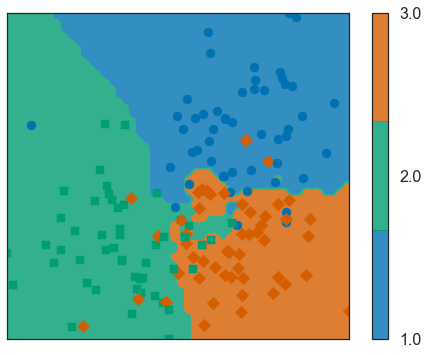

In [269]:
# Decision function for dataset #2
clf = neighbors.KNeighborsClassifier(5)
model = clf.fit(X2.tolist(), y2)
frontiere_new(model, X2, y2, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Decision function for dataset #2")
plt.show()

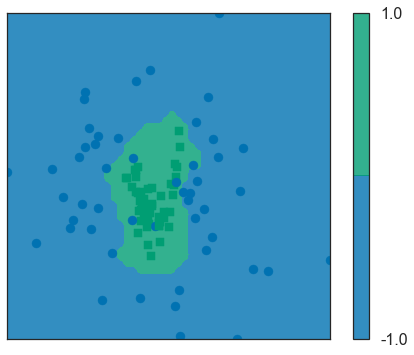

In [283]:
# Decision function for dataset #3
clf = neighbors.KNeighborsClassifier(5)
model = clf.fit(X3.tolist(), y3)
frontiere_new(model, X3, y3, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Decision function for dataset #3")
plt.show()

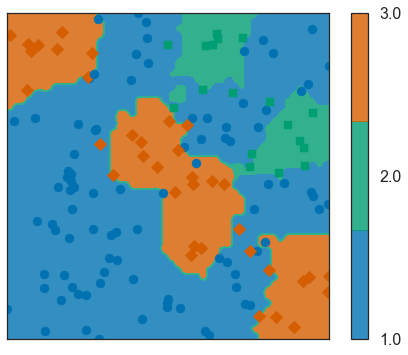

In [284]:
# Decision function for dataset #4
clf = neighbors.KNeighborsClassifier(5)
model = clf.fit(X4.tolist(), y4)
frontiere_new(model, X4, y4, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Decision function for dataset #4")
plt.show()

#### 6) Pour les observations d’indice pair du jeu de données #2, faites varier le nombre k de voisins pris en compte : k = 1,2,...,n. Que devient la méthode dans le cas extrême où k = 1? k = n? Afficher ces cas sur les données étudiées en utilisant la fonction frontiere_new et présentez les dans une forme facilement lisible. Dans quels cas la frontière est-elle complexe ? simple ?

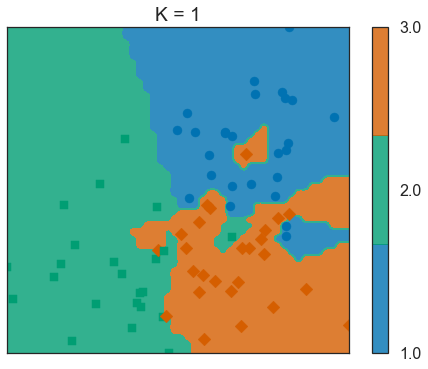

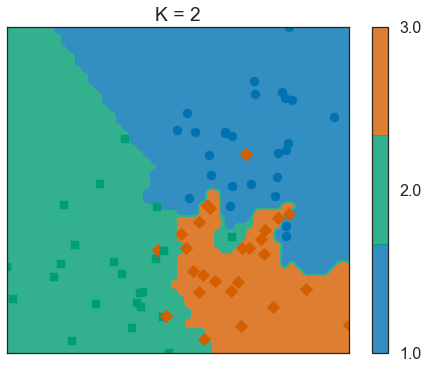

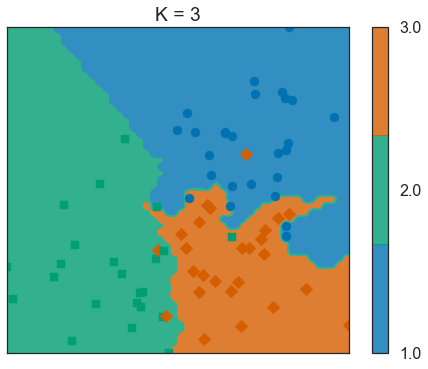

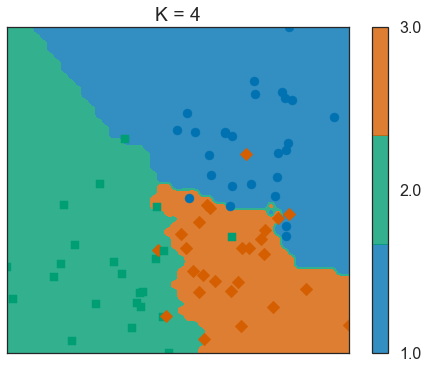

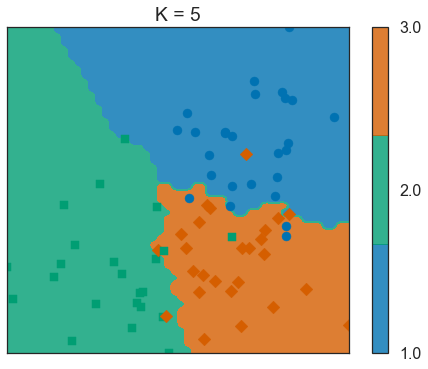

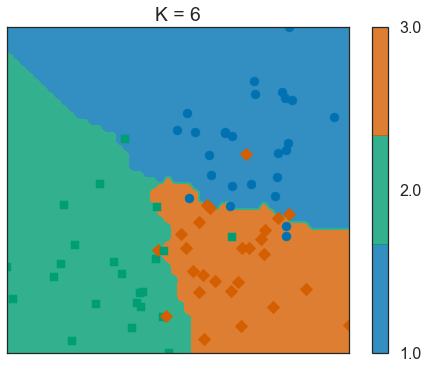

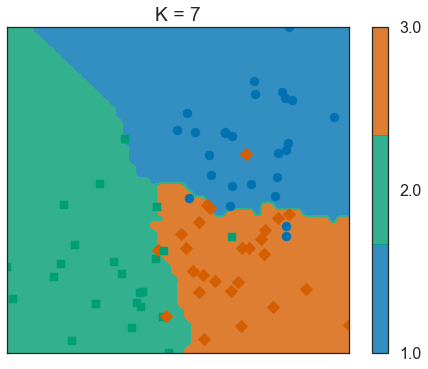

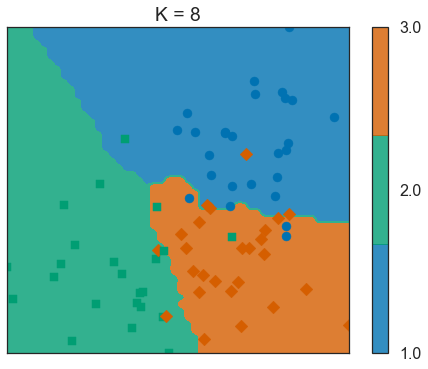

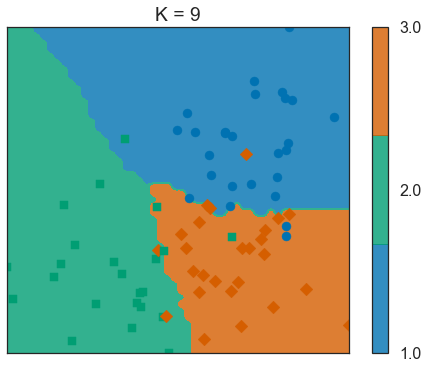

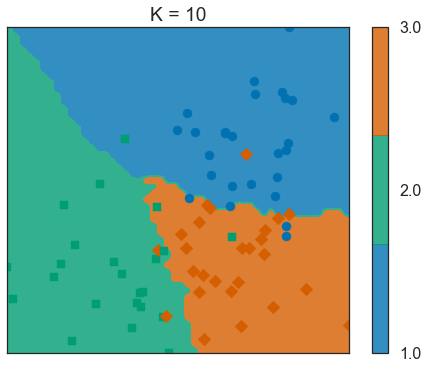

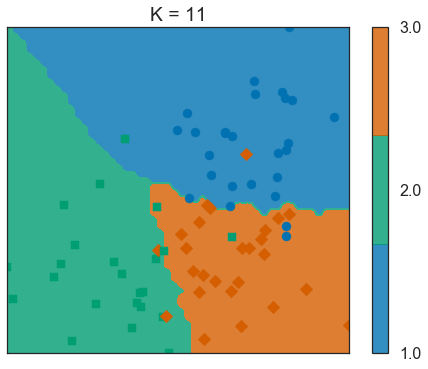

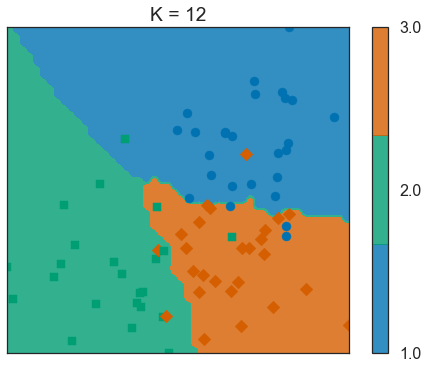

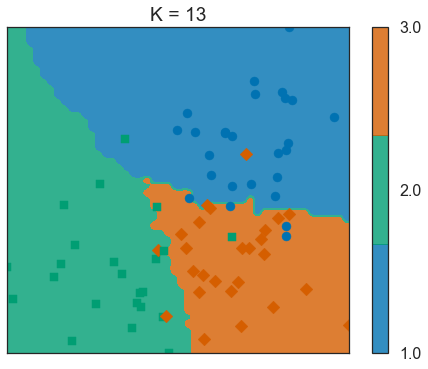

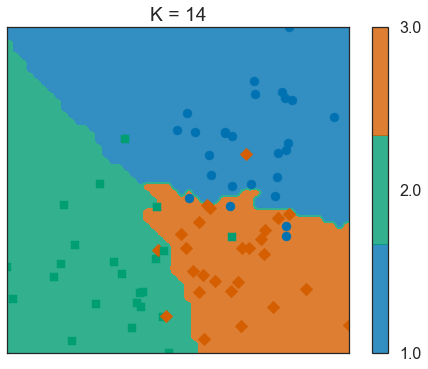

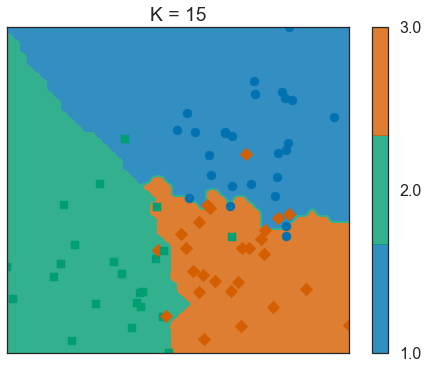

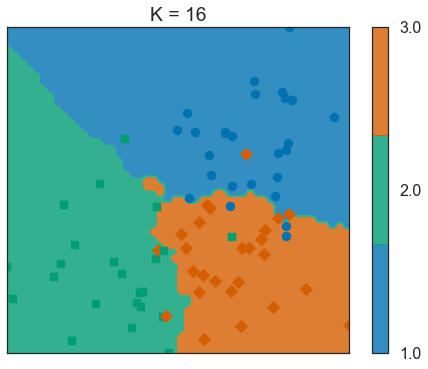

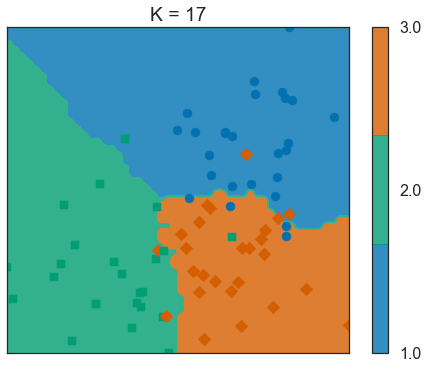

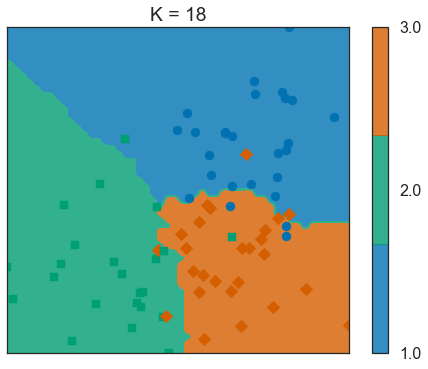

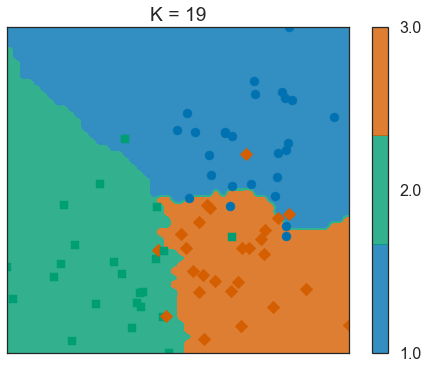

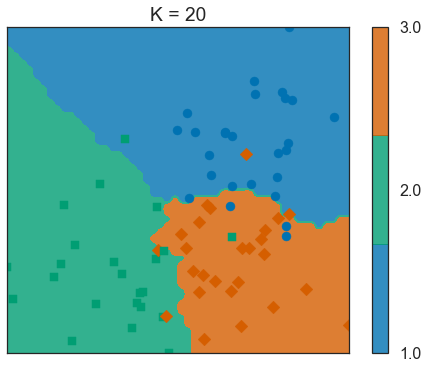

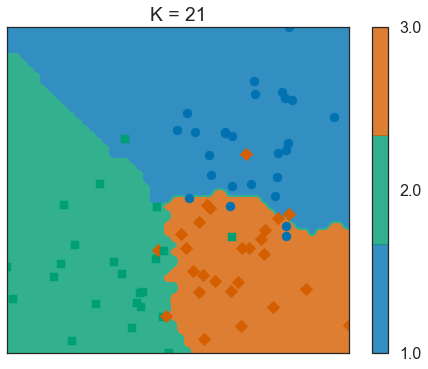

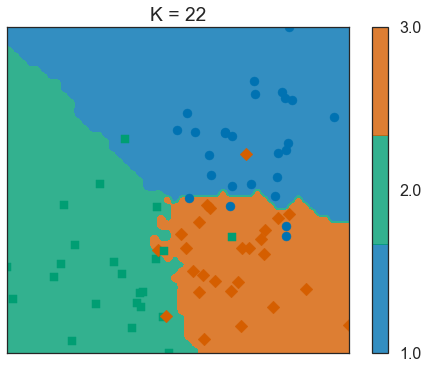

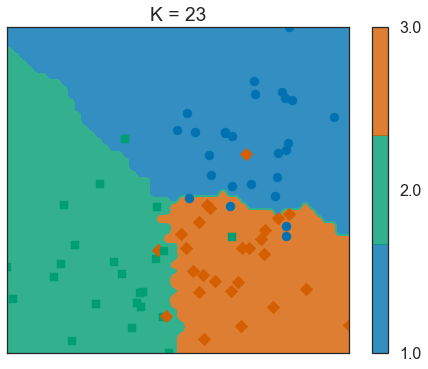

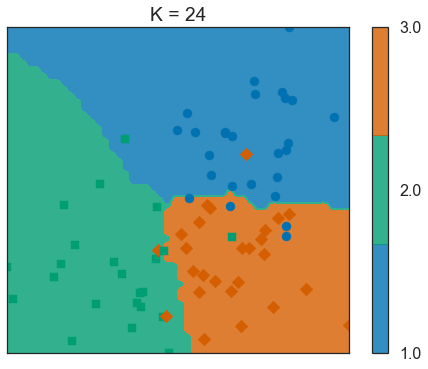

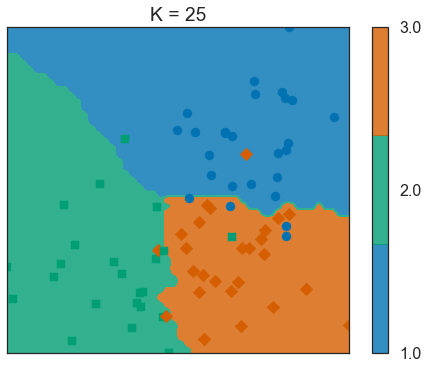

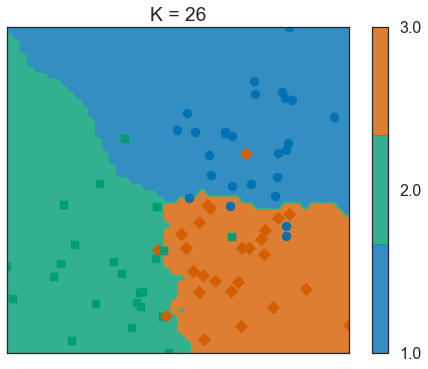

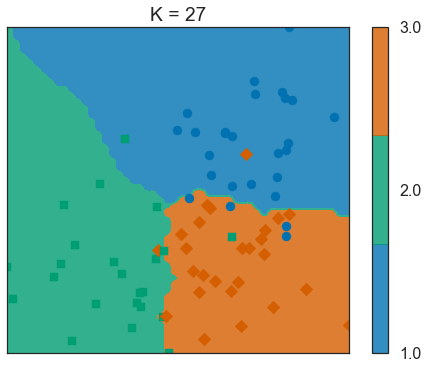

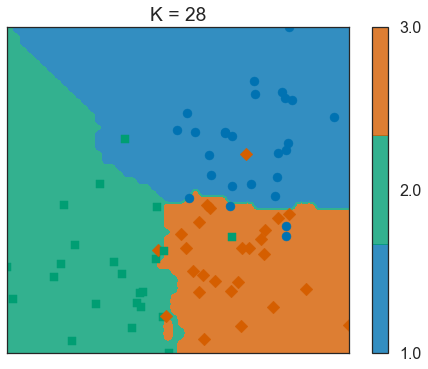

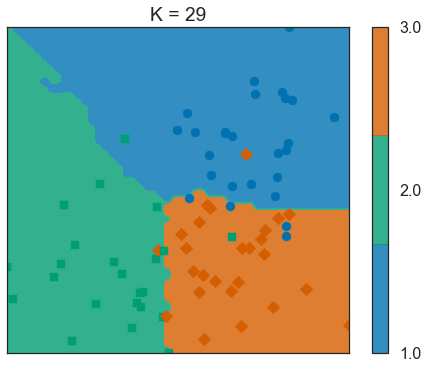

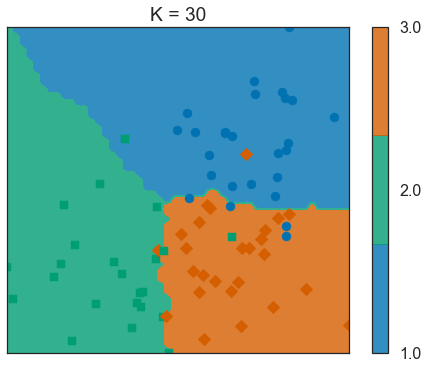

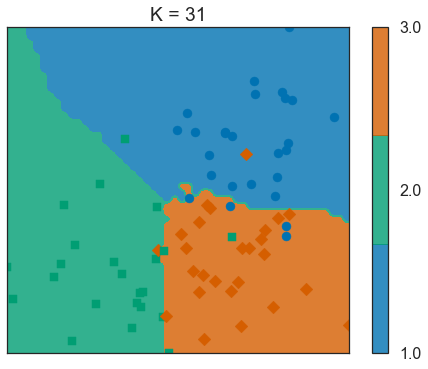

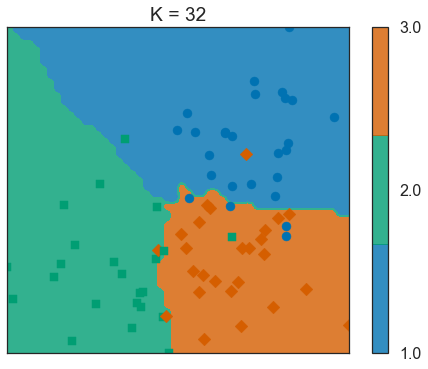

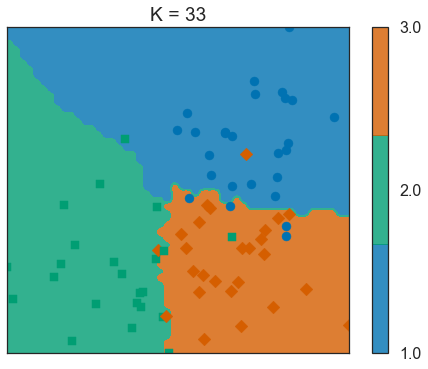

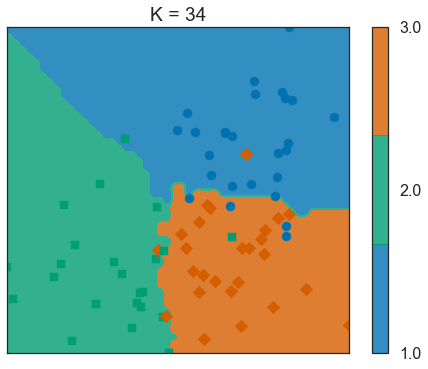

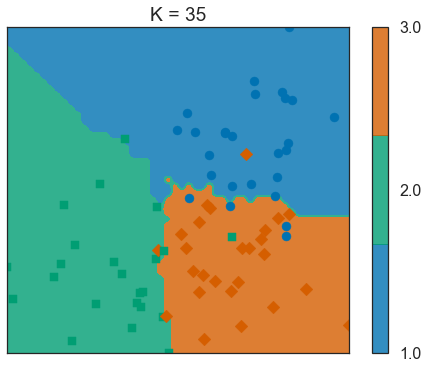

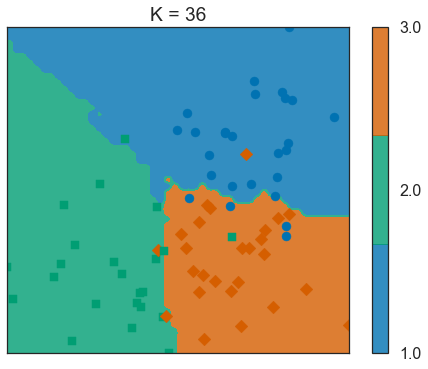

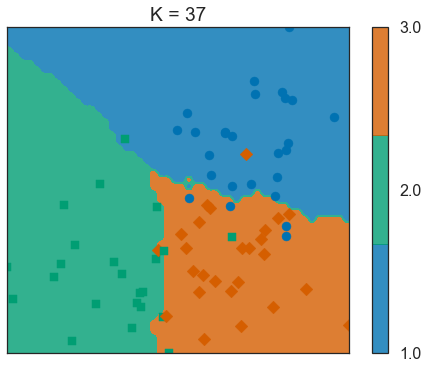

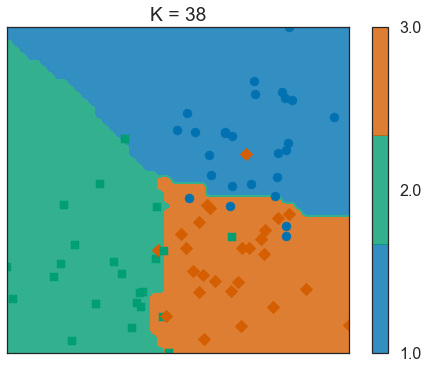

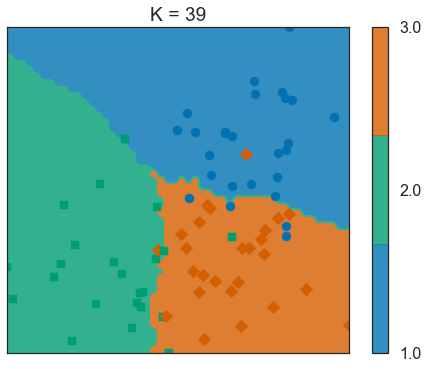

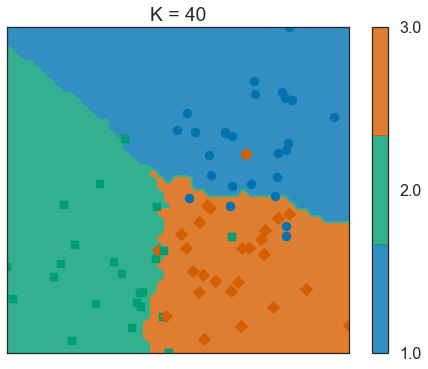

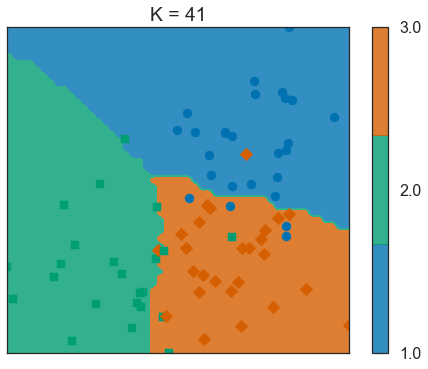

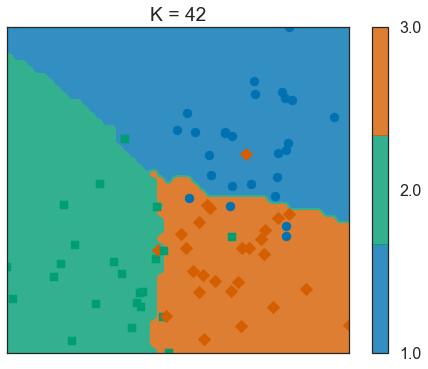

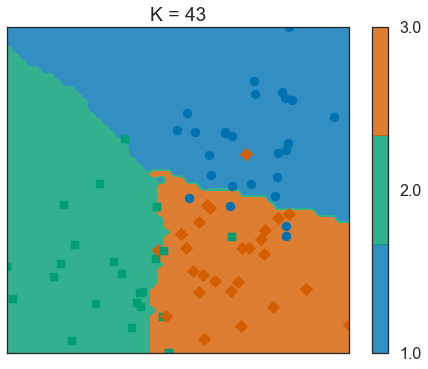

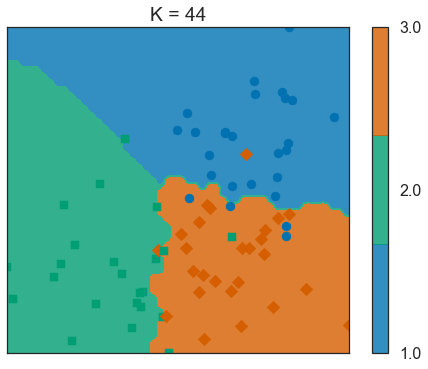

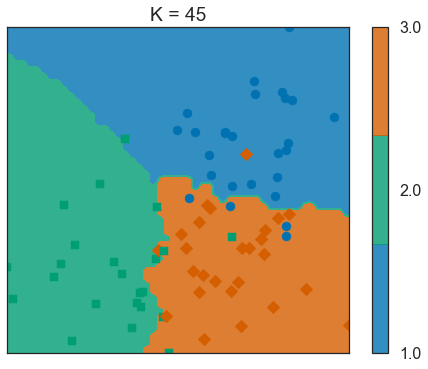

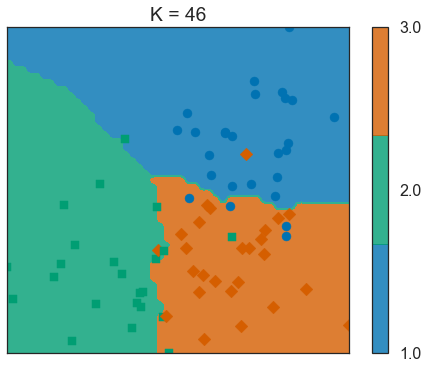

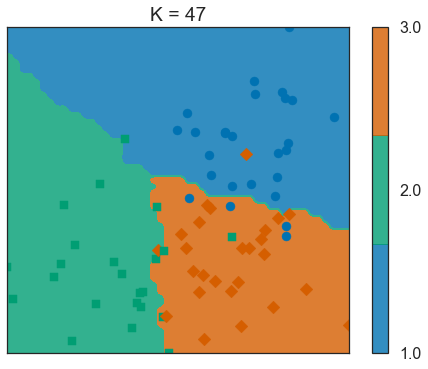

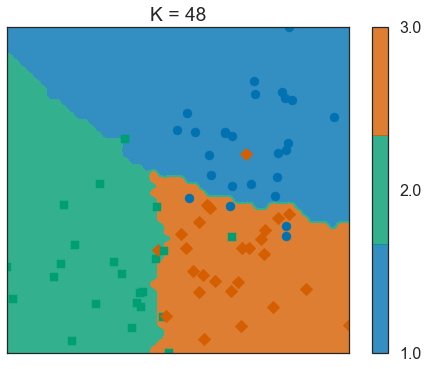

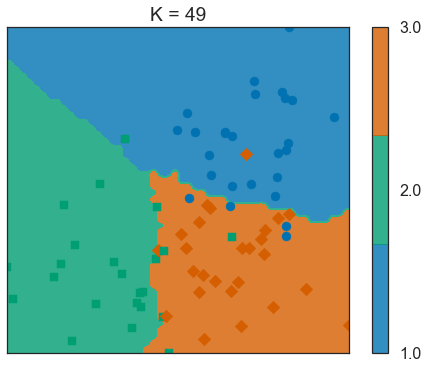

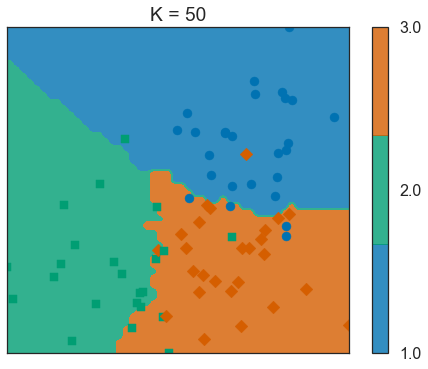

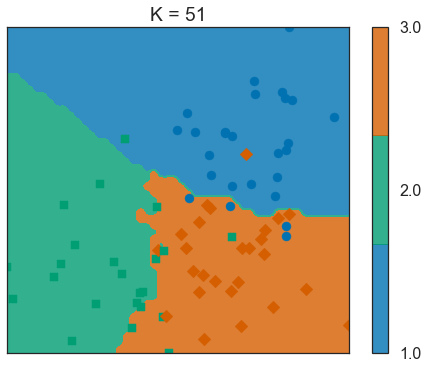

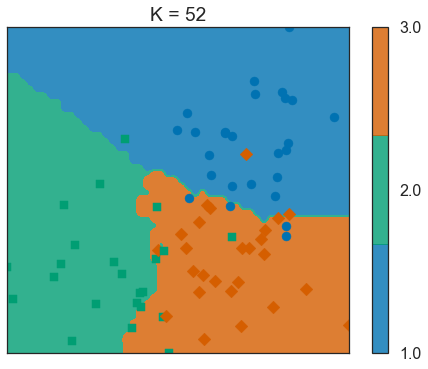

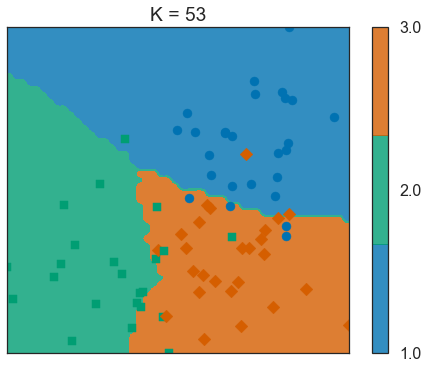

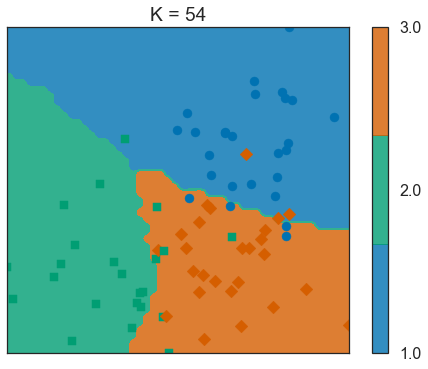

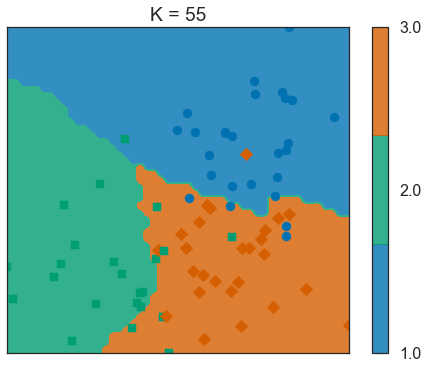

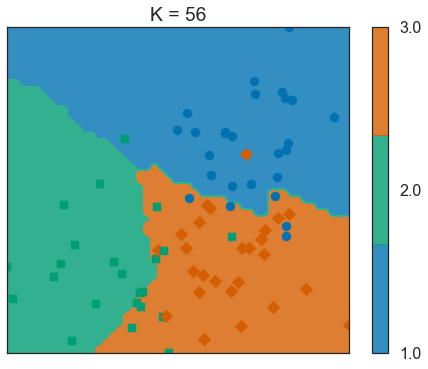

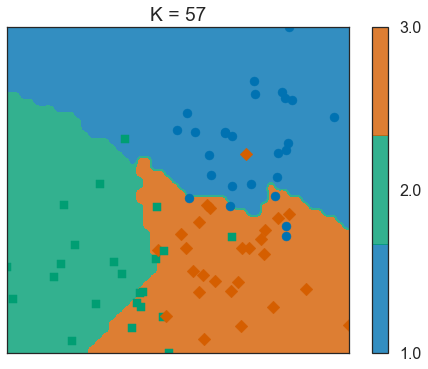

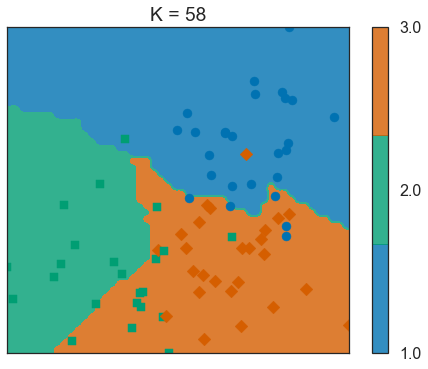

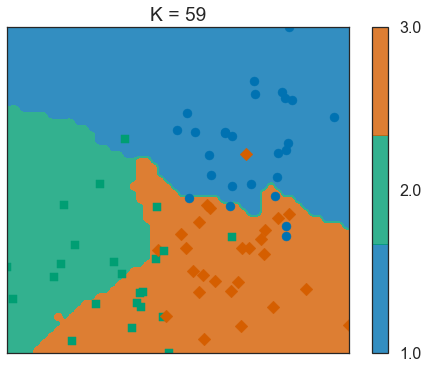

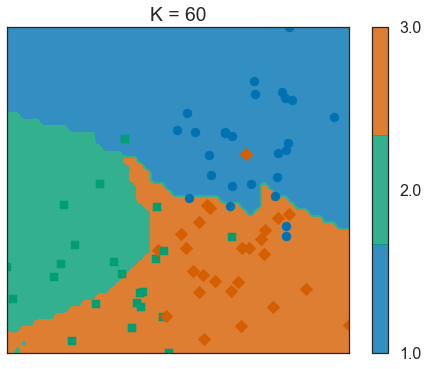

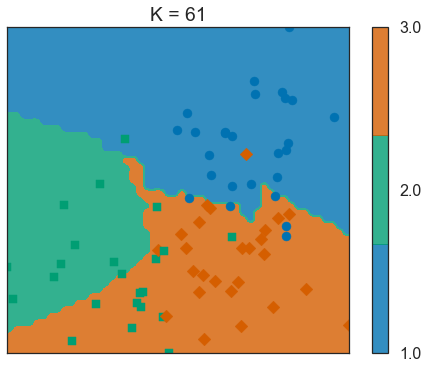

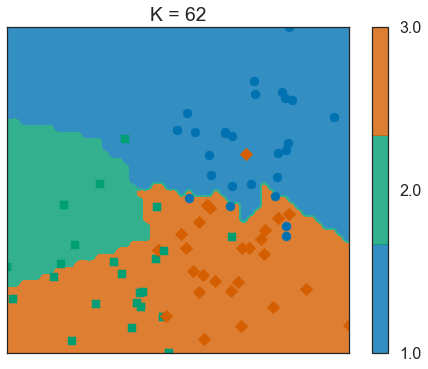

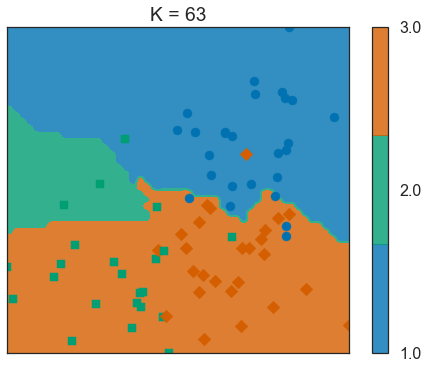

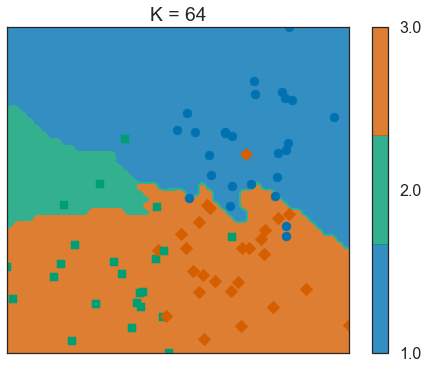

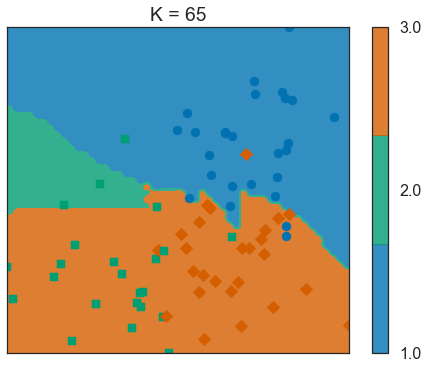

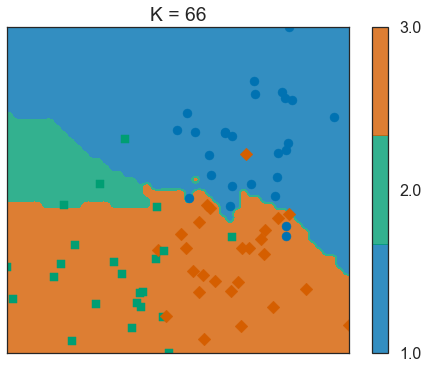

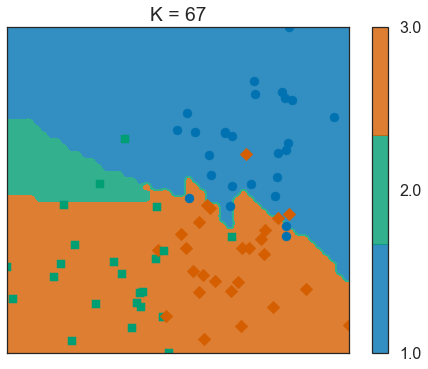

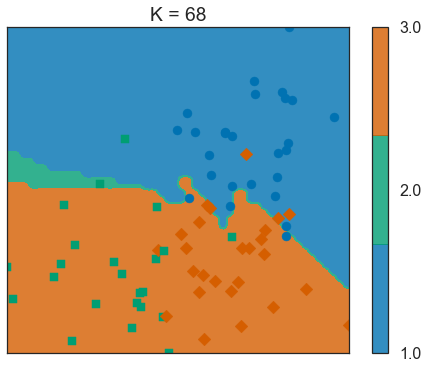

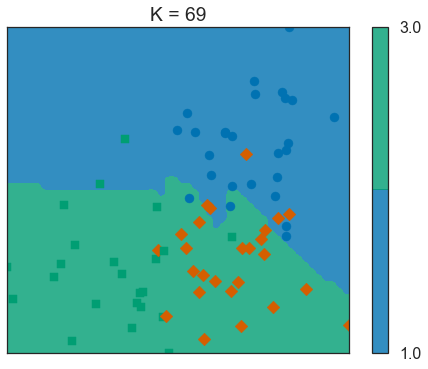

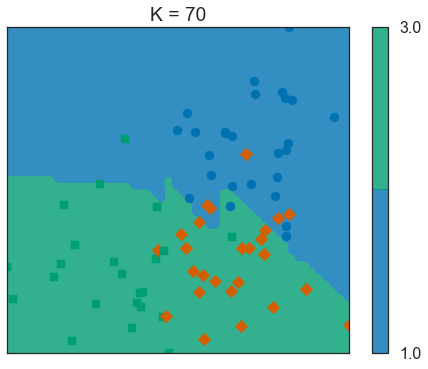

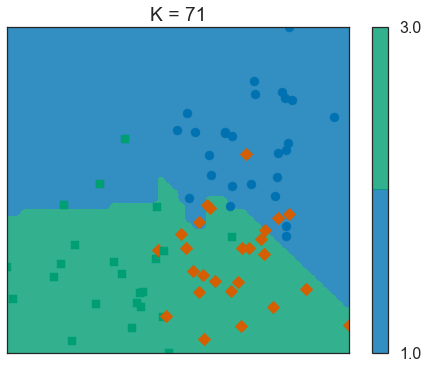

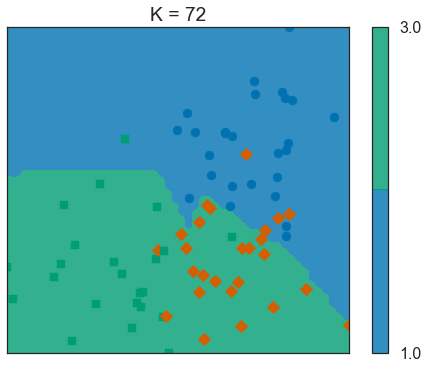

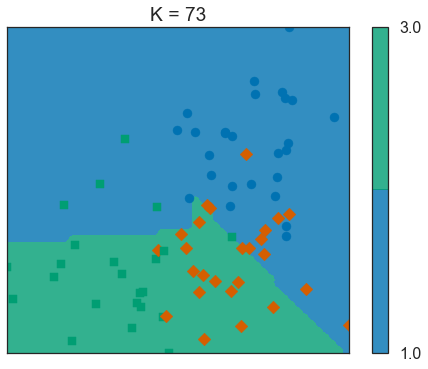

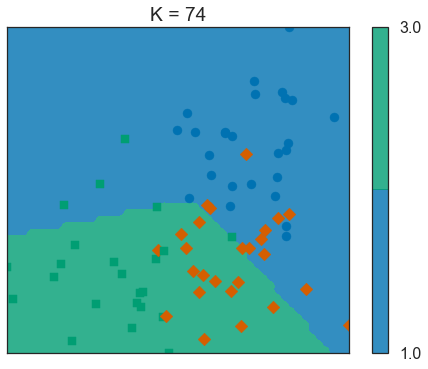

In [304]:
# Split the data and retrieve the instances corresponding to even indices
X2_even = X2[::2]
y2_even = y2[::2]
k_range = np.arange(1,len(X2_even) + 1)

# Decision function for dataset #2 with varying k
for k in k_range:
    clf = neighbors.KNeighborsClassifier(k)
    model = clf.fit(X2_even.tolist(), y2_even)
    frontiere_new(model, X2_even, y2_even, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
    plt.title('K = %i' %k)
    plt.show()

Dans le cas extrême ou k = 1, la fonction de décision est complexe et il y a risque d'overfitting. Dans le cas ou k = n, la fonction de décision devient triviale et l'ensemble de l'espace est associé à un unique groupe.

#### 7) Une variante possible très utilisée consiste à pondérer les poids du jème voisin selon $exp(−d^2_j/h)$ (h contrôlant le niveau de pondération). Implémentez cette variante dans scikit-learn en passant le paramètre weights au constructeur de KNeighborsClassifier.

In [846]:
# Définition des fonctions de poids à utiliser dans l'algorithme KNN
def weight_function_1(dist):
    retval = np.exp(-(np.power(dist,2)/0.01))
    return retval

def weight_function_2(dist):
    retval = np.exp(-(np.power(dist,2)/0.1))
    return retval

def weight_function_3(dist):
    retval = np.exp(-(np.power(dist,2)/1))
    return retval

def weight_function_4(dist):
    retval = np.exp(-(np.power(dist,2)/10))
    return retval

def weight_function_5(dist):
    retval = np.exp(-(np.power(dist,2)/100))
    return retval

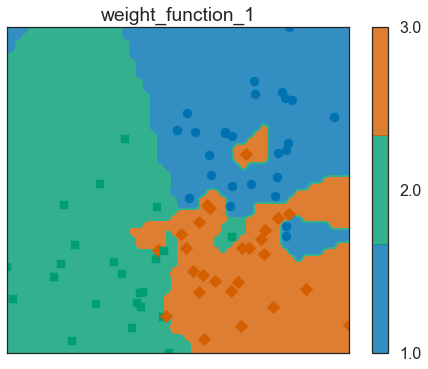

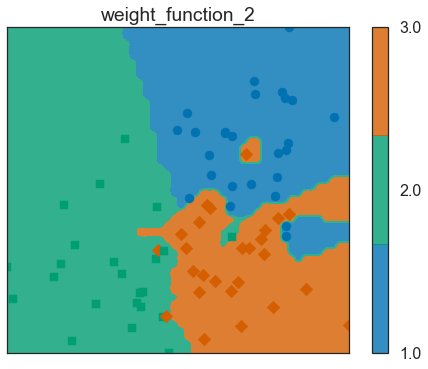

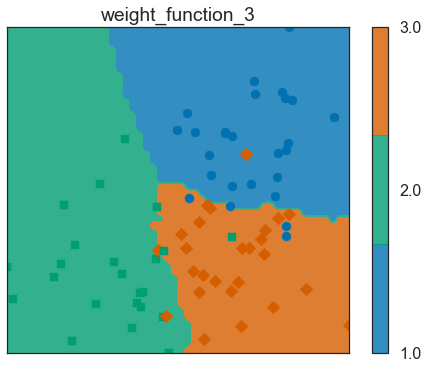

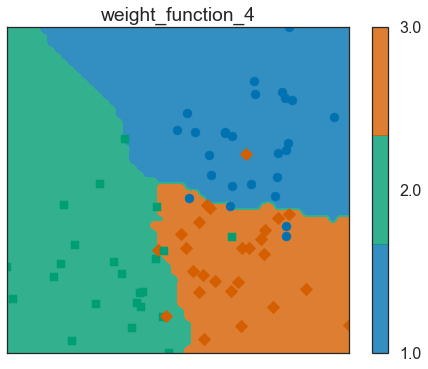

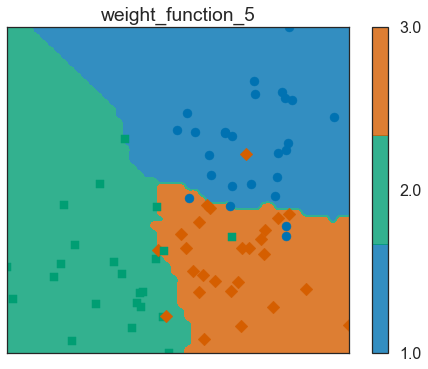

In [356]:
weight_function_list = [weight_function_1, weight_function_2 ,weight_function_3 ,weight_function_4 ,weight_function_5]

# Itération sur les différentes fonctions de poids
for func in weight_function_list:
    
    # Decision function for dataset #2
    clf = neighbors.KNeighborsClassifier(7, weights = func)
    model = clf.fit(X2_even.tolist(), y2_even)
    frontiere_new(model, X2_even, y2_even, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
    plt.title('%s' %func.__name__)
    plt.show()

#### 8) Quel est le taux d’erreur sur les mêmes données d’apprentissage (i.e., la proportion d’erreur faite par le classifieur) lorsque k = 1 ? et sur des données de test (les observations d’indice pair) ?

In [364]:
# Split the data and retrieve the instances corresponding to even indices
X2_uneven = X2[1::2]
y2_uneven = y2[1::2]

predictions_even=[]
predictions_uneven=[]
k = 1

clf = neighbors.KNeighborsClassifier(k)
model = clf.fit(X2_uneven.tolist(), y2_uneven)

for x in range(len(X2_even)):
    
    # Predictions on the training and test sets using sklearn
    pred_uneven = model.predict([X2_uneven[x].tolist()])[0]
    predictions_uneven.append(pred_uneven)
    pred_even = model.predict([X2_even[x].tolist()])[0]
    predictions_even.append(pred_even)


accuracy_uneven = accuracy_score(y2_uneven, predictions_uneven)
accuracy_even = accuracy_score(y2_even, predictions_even)
print("Le taux d’erreur sur les mêmes données d’apprentissage (impairs) est de {}%".format(100 - accuracy_uneven))
print("Le taux d’erreur sur les données de test (pairs) est de {}%".format(100 - accuracy_even))

Le taux d’erreur sur les mêmes données d’apprentissage (impairs) est de 0.0%
Le taux d’erreur sur les données de test (pairs) est de 29.33333333333333%


#### 9) Pour le jeu de données #4, en utilisant les observations d’indice pair pour l’apprentissage et les ob- servations d’indice impair pour le test, tracez le taux d’erreur en fonction de k pour k = 1, 2, . . . , 50. Vous pourrez utiliser la classe fournie ErrorCurve.

In [362]:
# Split the data
X4_even = X4[::2]
y4_even = y4[::2]

X4_uneven = X4[1::2]
y4_uneven = y4[1::2]

predictions_even=[]
predictions_uneven=[]
k_range = np.arange(1,50 + 1)

for k in k_range:
    
    for x in range(len(X4_uneven)):

        clf = neighbors.KNeighborsClassifier(k)
        model = clf.fit(X2_even.tolist(), y2_even)
        pred_uneven = model.predict([X4_uneven[x].tolist()])[0]
        predictions_uneven.append(pred_uneven)



accuracy_uneven = accuracy_score(y2_uneven, predictions_uneven)
accuracy_even = accuracy_score(y2_even, predictions_even)
print("Le taux d’erreur sur les mêmes données d’apprentissage (impairs) est de {}%".format(100 - accuracy_uneven))
print("Le taux d’erreur sur les données de test (pairs) est de {}%".format(100 - accuracy_even))

70.66666666666667

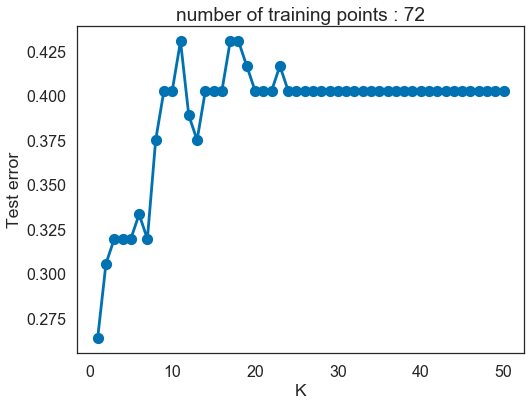

In [389]:
curve = ErrorCurve(k_range = np.arange(1,50 + 1))
curve.fit_curve(X4_even, y4_even, X4_uneven, y4_uneven)
curve.plot()
plt.show()

#### 10) Tracez les différentes courbes d’erreur en fonction du paramètre k = (1,2,...,50) sur le jeu de données #4, pour des nombres d’échantillons d’entrainement n prenant les valeurs 100, 200, 500 à 1000. Cette fois, tirez l’ensemble d’apprentissage et l’ensemble de test indépendamment et de même taille. Quelle est la meilleure valeur de k ? Est-ce la même pour les différents datasets ? Vous pourrez utiliser la classe fournie ErrorCurve. Pour n = 1000 visualisez les données et la règle de décision sur le même graphique. (Vous pouvez utiliser la fonction frontiere_new.)

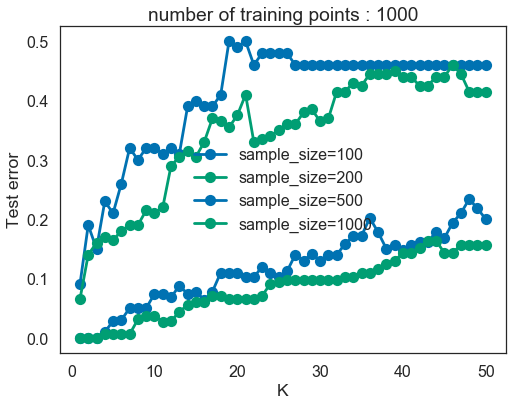

In [938]:
sample_size = [100, 200, 500, 1000]
X_train_samples = []
y_train_samples = []
X_test_samples = []
y_test_samples = []
for i in range(4):
    ind_train = np.random.choice(len(X4),sample_size[i])
    ind_test = np.random.choice(len(X4),sample_size[i])
    X_train_samples.append(X4[ind_train,:])
    y_train_samples.append(y4[ind_train])
    X_test_samples.append(X4[ind_test,:])
    y_test_samples.append(y4[ind_test])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(4):
    curve = ErrorCurve(k_range = np.arange(1,50 + 1))
    curve.fit_curve(X_train_samples[i], y_train_samples[i], X_test_samples[i], y_test_samples[i])
    curve.plot(label='sample_size=%i'%sample_size[i])
    plt.legend()


plt.show() 


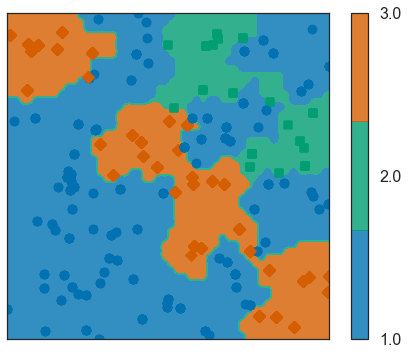

In [434]:
clf = neighbors.KNeighborsClassifier(1)
model = clf.fit(X_train_samples[3], y_train_samples[3])
frontiere_new(model, X_train_samples[3], y_train_samples[3], w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Decision function for n = 1000")
plt.show()

#### 11) A votre avis, quels sont les avantages et les inconvénients de la méthode des plus proches voisins : temps de calcul ? passage à l’échelle ? interprétabilité ?

#### 12) Étudiez la base digits de scikit-learn. On pourra se référer à http://scikit-learn.org/stable/ _downloads/plot_digits_classification.py pour le chargement et la manipulation de la base de données. Pour de plus amples informations sur la nature de la classe 'Bunch' (une sous-classe de dictionnaire, on se reportera à la documentation sur la classe 'dict' : http://docs.python.org/ 2/library/stdtypes.html#mapping-types-dict. Décrivez la nature et le format des données (précisément), affichez un exemple. Tracez l’histogramme pour des classes. Coupez l’échantillon en deux parties de même taille et utilisez la première partie pour l’apprentissage et la deuxième pour le test. Appliquez la méthode aux données issues de la base digits pour un choix de k ≥ 1 (e.g., k = 30) et indiquez le taux d’erreur.

In [452]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [458]:
print(len(digits.data), type(digits.data))
print(len(digits.images), type(digits.data))
print(len(digits.target), type(digits.data))

1797 <class 'numpy.ndarray'>
1797 <class 'numpy.ndarray'>
1797 <class 'numpy.ndarray'>


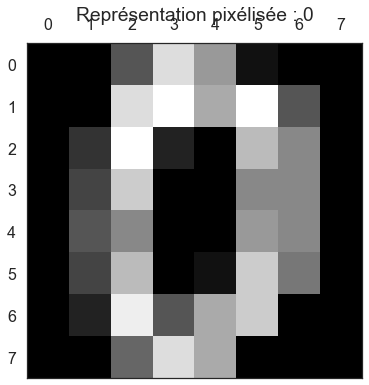

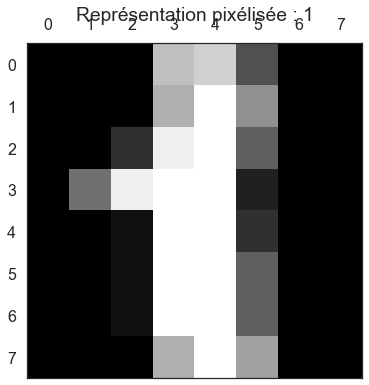

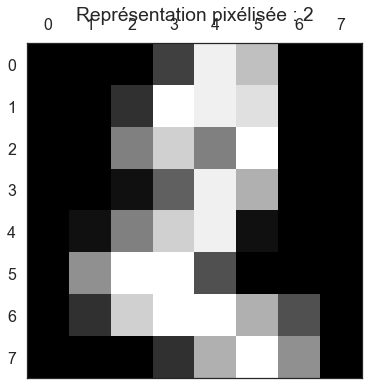

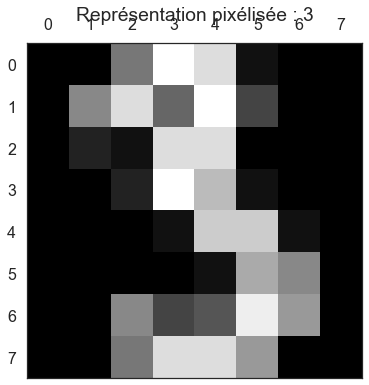

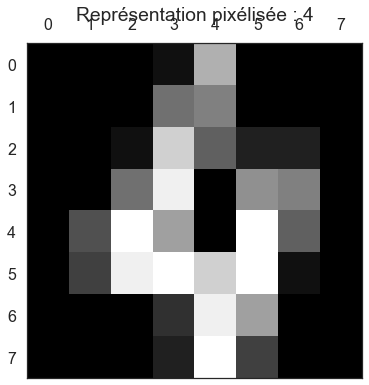

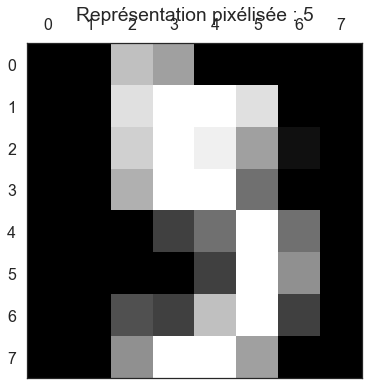

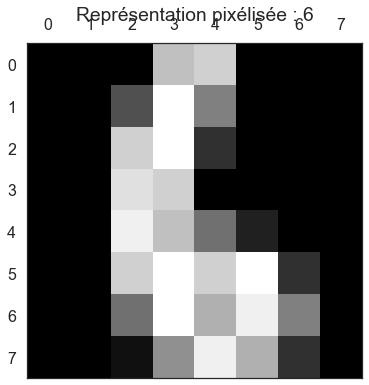

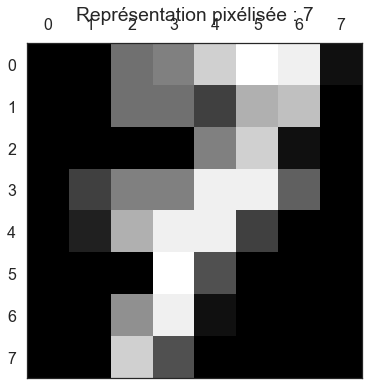

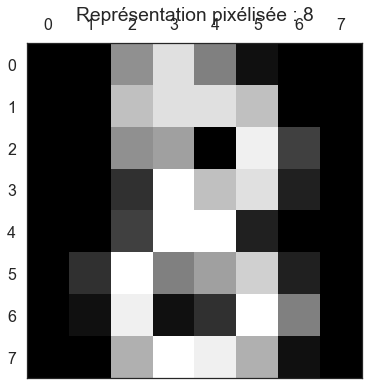

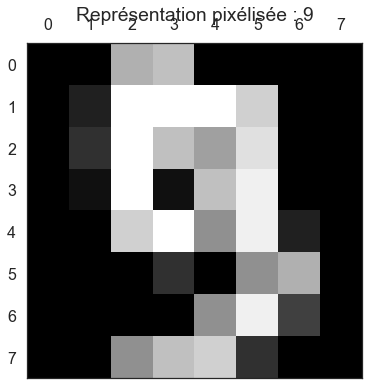

In [857]:
for i in range(0, 10):
    plt.gray() 
    plt.matshow(digits.images[i]) 
    plt.title("Représentation pixélisée : %i"%i)
    plt.show()

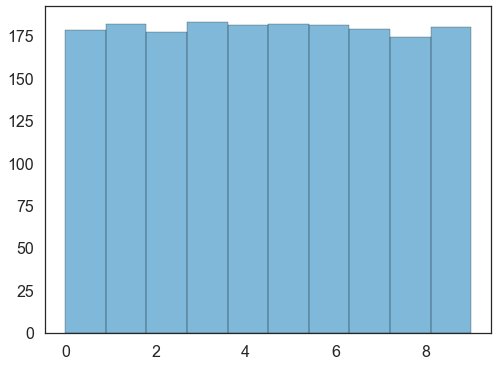

In [478]:
plt.hist(digits.target, alpha=0.5, histtype='bar', ec='black')
plt.title("Répartition des classes au sein de la base de données digits")
plt.show()

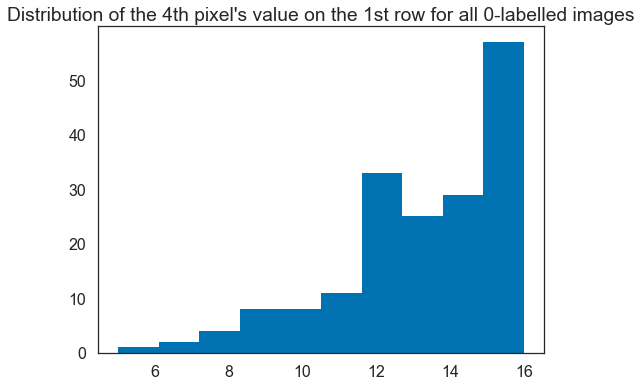

In [500]:
# Let's observe the distribution of the 4th pixel's value on the 1st row for all 0-labelled images
single_pixel = []
single_pixel += (digits.images[i][0][3] for i in range(1797) if digits.target[i] == 0)
plt.hist(single_pixel)
plt.title('Distribution of the 4th pixel\'s value on the 1st row for all 0-labelled images')
plt.show()

In [533]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=1)

predictions_digits = []
k = 30
for x in range(len(X_test)):
    
    clf = neighbors.KNeighborsClassifier(k)
    model = clf.fit(X_train, y_train)
    pred = model.predict([X_test[x]])[0]
    predictions_digits.append(pred)

accuracy = accuracy_score(y_test, predictions_digits)
print("Le taux d’erreur sur les données de test est de {}%".format(100 - accuracy))

Le taux d’erreur sur les données de test est de 6.117908787541708%


#### 13) Estimez la matrice de confusion $(P\{Y = i, Ck(X) = j\})_i,_j$ associée au classifieur Ck ainsi obtenu et visualisez celle-ci. Pour la manipulation de telles matrices avec scikit-learn, on pourra consulter http://scikit-learn.org/stable/auto_examples/model_selection/plot_ confusion_matrix.html.

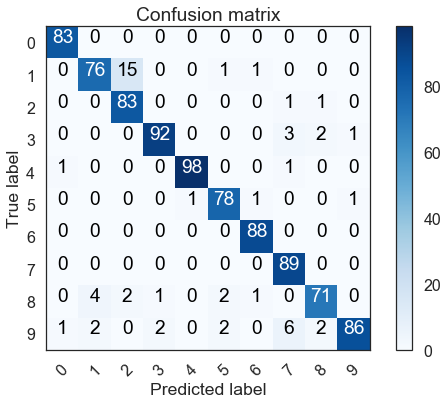

In [535]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


class_names = digits.target_names
conf_mat = confusion_matrix(y_test, predictions_digits)
plt.figure()
plot_confusion_matrix(conf_mat, classes=class_names,title='Confusion matrix')
plt.show()

#### 14) Proposez une méthode pour choisir k et mettez-la en œuvre. Vous pourrez utiliser la classe fournie LOOCurve. En utilisant toutes les données, tracez la courbe du taux d’erreur leave-one-out pour k = 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200. Pour plus d’information sur la validation croisée (cross- validation) on peut consulter [HTF09, Chapitre 7.10].

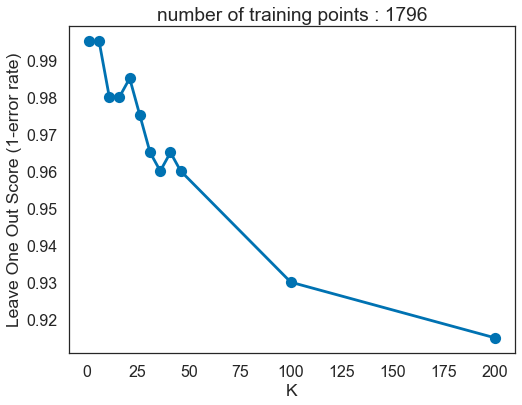

In [539]:
curve = LOOCurve(k_range = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200])
curve.fit_curve(digits.data, digits.target)
curve.plot()
plt.show()

#### 15) En utilisant la formule de Bayes donner la formule des probabilités a posteriori : $P\{Y = +1 | X = x\}$, $P\{Y =−1|X=x\}$,commefonctionsde $f_+$, $f_−$ et $π_+$.

#### 16) Exprimer le log-ratio des deux classes

#### 17) Justifier le choix du classifieur

#### 18) Écrivez votre propre classe LDAClassifier avec les méthodes d’apprentissage fit et de classification predict.

In [847]:
class LDAClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade LDA classifier class """

    def __init__(self):
        pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, x):

        def get_pi_pos(y):
            pi_pos = np.count_nonzero(y == 1)/y.size
            return pi_pos
        
        def get_mu_pos(X, y):
            mu_pos = sum([x_i for x_i, y_i in zip(X, y) if y_i == 1])/np.count_nonzero(y == 1)
            return mu_pos
        
        def get_mu_neg(X, y):
            mu_neg = sum([x_i for x_i, y_i in zip(X, y) if y_i == -1])/np.count_nonzero(y == -1)
            return mu_neg
        
        def get_sigma_pos(X, y, mu_pos):
            sigma_pos = sum([np.dot((x_i-mu_pos).reshape((-1,1)),(x_i-mu_pos).reshape((-1,1)).T) for x_i, y_i in zip(X, y) if y_i == 1])/(np.count_nonzero(y == 1)-1)
            return sigma_pos
        
        def get_sigma_neg(X, y, mu_neg):
            sigma_neg = sum([np.dot((x_i-mu_neg).reshape((-1,1)),(x_i-mu_neg).reshape((-1,1)).T) for x_i, y_i in zip(X, y) if y_i == -1])/(np.count_nonzero(y == -1)-1)
            return sigma_neg
        
        def get_sigma(sigma_pos, sigma_neg):
            sigma = ((np.count_nonzero(y == 1)-1)*sigma_pos+(np.count_nonzero(y == -1)-1)*sigma_neg)/(np.count_nonzero(y)-2)
            return sigma
        
        def get_result(pi_pos, mu_pos, mu_neg, sigma, x):
            result = []
            for x_i in x:
                if np.dot(np.dot(x_i.reshape((-1,1)).T, np.linalg.inv(sigma)), (mu_pos - mu_neg).reshape((-1,1))) > 0.5 * np.dot(np.dot(mu_pos.reshape((-1,1)).T, np.linalg.inv(sigma)), mu_pos.reshape((-1,1))) -0.5 * np.dot(np.dot(mu_neg.reshape((-1,1)).T, np.linalg.inv(sigma)), mu_neg.reshape((-1,1)))+ np.log(1 -pi_pos)- np.log(pi_pos): 
                    result.append(1)
                else:
                    result.append(-1)
            return result
        
        
        self.pi_pos = get_pi_pos(self.y)
        self.mu_pos = get_mu_pos(self.X, self.y)
        self.mu_neg = get_mu_neg(self.X, self.y)
        self.sigma_pos = get_sigma_pos(self.X, self.y, self.mu_pos)
        self.sigma_neg = get_sigma_neg(self.X, self.y, self.mu_neg)
        self.sigma = get_sigma(self.sigma_pos, self.sigma_neg)

        result = get_result(self.pi_pos, self.mu_pos, self.mu_neg, self.sigma, x)
        
        return result


#### 19) Importez le module sklearn.discriminant_analysis qui contient en particulier la classe LinearDiscriminantAnalysis qui nous servira dans la suite.

In [837]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n1 = 100
n2 = 30
mu1 = [1., 1.]
mu2 = [6., 6.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]

X5, y5 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.9)

predictions_homemade=[]
predictions=[]
count = 0

clf_homemade = LDAClassifier()
model_homemade = clf_homemade.fit(X5_train, y5_train)

clf = LinearDiscriminantAnalysis()
model = clf.fit(X5_train, y5_train)

for i in range(len(X5_test)):

    # Predictions using our homemade class
    pred_homemade = model_homemade.predict([X5_test[i]])
    predictions_homemade.append(pred_homemade)
    
    # Predictions using sklearn
    pred = model.predict([X5_test[i].tolist()])
    predictions.append(pred)
    
    if pred_homemade == pred:
        count+=1
        

accuracy_homemade = accuracy_score(y5_test, predictions_homemade)
accuracy = accuracy_score(y5_test, predictions)
print('Homemade accuracy: ' + repr(accuracy_homemade*100) + '%')
print('Sklearn accuracy: ' + repr(accuracy*100) + '%')
print('Number of corresponding predictions: ' + repr(count))


Homemade accuracy: 100.0%
Sklearn accuracy: 100.0%
Number of corresponding predictions: 117


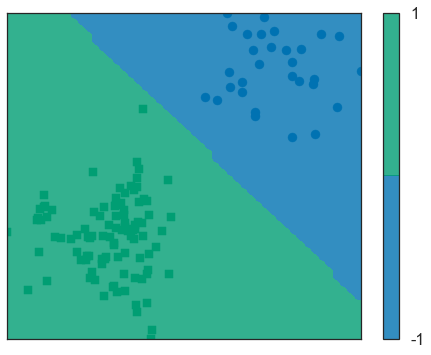

In [817]:
# Decision function for dataset #5
clf = LDAClassifier()
model = clf.fit(X5, y5)
frontiere_new(model, X5, y5, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Fonction de décision pour le jeu de données #5")
plt.show()

#### 20) En utilisant votre classe LDAClassifier, visualisez la règle de classification pour les jeux de données #1 et #3. (Vous pouvez utiliser la fonction frontiere_new.) Discutez l’efficacité de la méthode dans ces deux cas.

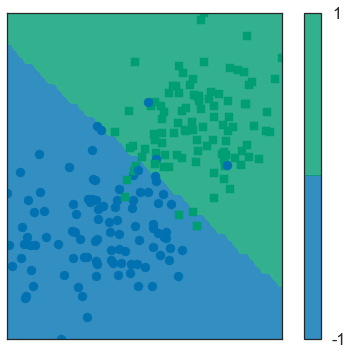

In [818]:
# Decision function for dataset #1
clf = LDAClassifier()
model = clf.fit(X1, y1)
frontiere_new(model, X1, y1, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Fonction de décision pour le jeu de données #1")
plt.show()

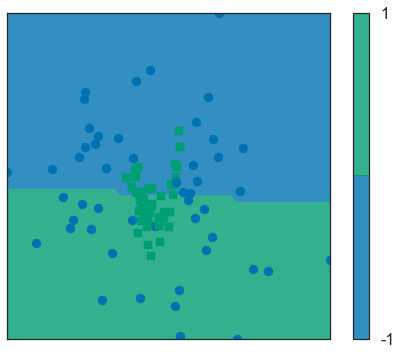

In [819]:
# Decision function for dataset #3
clf = LDAClassifier()
model = clf.fit(X3, y3)
frontiere_new(model, X3, y3, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Fonction de décision pour le jeu de données #3")
plt.show()

#### 21) Appliquez la classification par régression logistique sur les données rand_bi_gauss. Comparer les résultats avec la LDA, notamment lorsque une classe est beaucoup plus petite que l’autre (a beau- coup moins d’observations). On parle alors de classes déséquilibrées.

In [813]:
from sklearn import linear_model

n1 = 100
n2 = 100
n3 = 10
n4 = 190
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]

X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

X2, y2 = rand_bi_gauss(n3, n4, mu1, mu2, sigmas1, sigmas2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

clf_balanced_LDA = LDAClassifier()
model_balanced_LDA = clf_balanced_LDA.fit(X1_train, y1_train)
pred_balanced_LDA = model_balanced_LDA.predict(X1_test)
accuracy_balanced_LDA = accuracy_score(y1_test, pred_balanced_LDA)

clf_balanced_LR = linear_model.LogisticRegression()
model_balanced_LR = clf_balanced_LR.fit(X1_train, y1_train)
pred_balanced_LR = model_balanced_LR.predict(X1_test)
accuracy_balanced_LR = accuracy_score(y1_test, pred_balanced_LR)

clf_imbalanced_LDA = LDAClassifier()
model_imbalanced_LDA = clf_imbalanced_LDA.fit(X2_train, y2_train)
pred_imbalanced_LDA = model_imbalanced_LDA.predict(X2_test)
accuracy_imbalanced_LDA = accuracy_score(y2_test, pred_imbalanced_LDA)

clf_imbalanced_LR = linear_model.LogisticRegression()
model_imbalanced_LR = clf_imbalanced_LR.fit(X2_train, y2_train)
pred_imbalanced_LR = model_imbalanced_LR.predict(X2_test)
accuracy_imbalanced_LR = accuracy_score(y2_test, pred_imbalanced_LR)

print("Précision dans le cas équilibré : LDA : {} - LR : {}".format(accuracy_balanced_LDA, accuracy_balanced_LR))
print("Précision dans le cas déséquilibré : LDA : {} - LR : {}".format(accuracy_imbalanced_LDA, accuracy_imbalanced_LR))

Précision dans le cas équilibré : LDA : 0.9166666666666666 - LR : 0.9166666666666666
Précision dans le cas déséquilibré : LDA : 0.9666666666666667 - LR : 0.9833333333333333


#### 22) À quoi correspond la variable coef_ du modèle ? intercept_ ?

La variable coef\_ correspond au coefficient des features dans la fonction de décision, et intercept\_ correspond au biais (ou constante) ajouté à la fonction de décision

#### 23) Utiliser la fonction frontiere_new pour visualiser la frontière de décision.

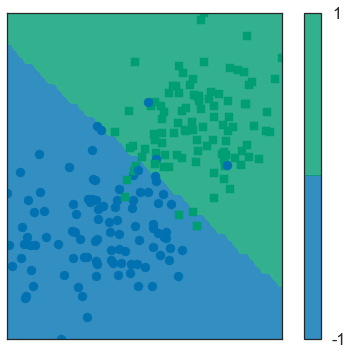

In [820]:
# Decision function for the balanced dataset
clf = LDAClassifier()
model = clf.fit(X1, y1)
frontiere_new(model, X1, y1, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Fonction de décision pour le jeu de données #1")
plt.show()

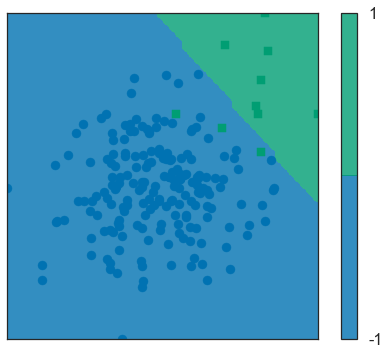

In [821]:
# Decision function for the imbalanced dataset
clf = LDAClassifier()
model = clf.fit(X2, y2)
frontiere_new(model, X2, y2, w=None, step=50, alpha_choice=1, colorbar=True, samples=True)
plt.title("Fonction de décision pour le jeu de données #2")
plt.show()

#### 24) Appliquez la classification par régression logistique à des données issues de la base digits. Comme précédemment, coupez l’échantillon en deux parties de même taille et utilisez la première partie pour l’apprentissage et la deuxième pour tester. Indiquez le taux d’erreur.

In [843]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=1)

    
clf = linear_model.LogisticRegression()
model = clf.fit(X_train, y_train)
predictions_digits_2 = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions_digits_2)
print("Le taux d'exactitude sur les données de test de la base digits est de {}%".format(accuracy))

Le taux d'exactitude sur les données de test de la base digits est de 0.946607341490545%
